In [8]:
import pandas as pd

data = pd.read_csv('supervised_clustering_data_with_shap.csv')

In [9]:
data.columns

Index(['SHAP Values', 'SHAP Values.1', 'SHAP Values.2', 'SHAP Values.3',
       'SHAP Values.4', 'SHAP Values.5', 'SHAP Values.6', 'SHAP Values.7',
       'SHAP Values.8', 'SHAP Values.9', 'SHAP Values.10', 'SHAP Values.11',
       'SHAP Values.12', 'SHAP Values.13', 'SHAP Values.14', 'SHAP Values.15',
       'SHAP Values.16', 'SHAP Values.17', 'SHAP Values.18', 'SHAP Values.19',
       'SHAP Values.20', 'SHAP Values.21', 'SHAP Values.22', 'SHAP Values.23',
       'SHAP Values.24', 'SHAP Values.25', 'SHAP Values.26', 'SHAP Values.27',
       'SHAP Values.28', 'SHAP Values.29', 'SHAP Values.30', 'SHAP Values.31',
       'SHAP Values.32', 'SHAP Values.33', 'SHAP Values.34', 'SHAP Values.35',
       'SHAP Values.36', 'Feature Values', 'Feature Values.1',
       'Feature Values.2', 'Feature Values.3', 'Feature Values.4',
       'Feature Values.5', 'Feature Values.6', 'Feature Values.7',
       'Feature Values.8', 'Feature Values.9', 'Feature Values.10',
       'Feature Values.11', 'Feature

c:\Users\shrin\anaconda3\Lib\site-packages\pyvista\jupyter\notebook.py:37: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


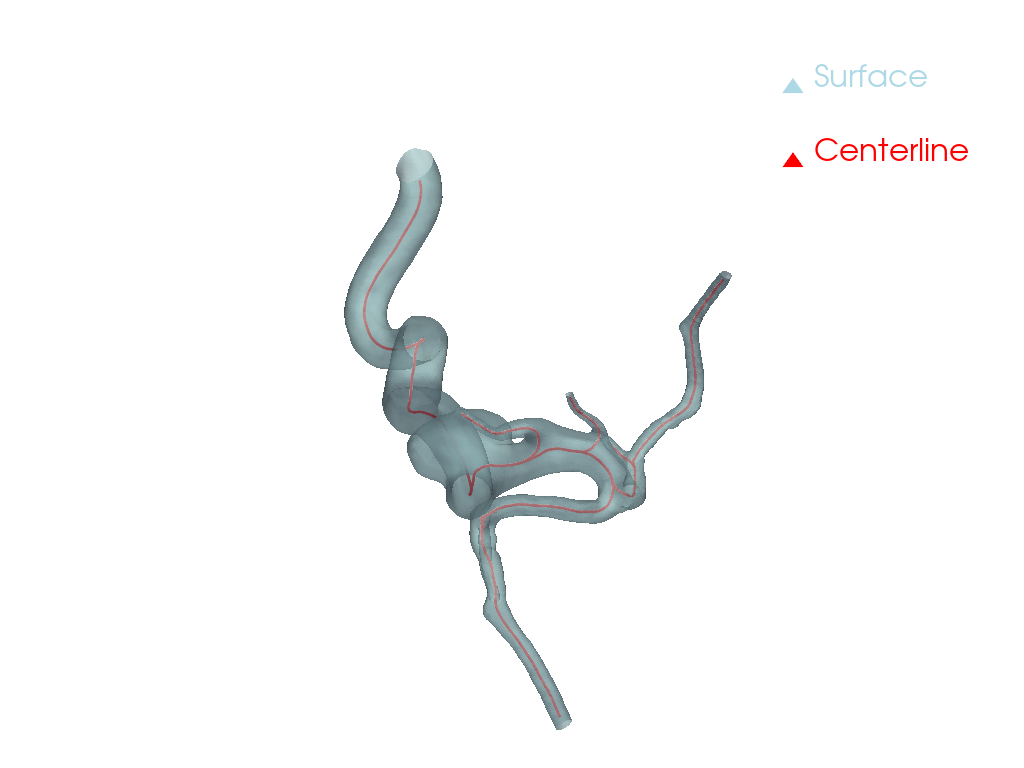

In [10]:
import pyvista as pv
#############3 LOW RISK
# Load the surface model
surface = pv.read("model_low.vtp")  # or model.vtp

# Load the centerline
centerline = pv.read("centerlines_low.vtp")

# Plot both together
plotter = pv.Plotter()
plotter.add_mesh(surface, color="lightblue", opacity=0.7, label="Surface")
plotter.add_mesh(centerline, color="red", line_width=3, label="Centerline")
plotter.add_legend()
plotter.show()


c:\Users\shrin\anaconda3\Lib\site-packages\pyvista\jupyter\notebook.py:37: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


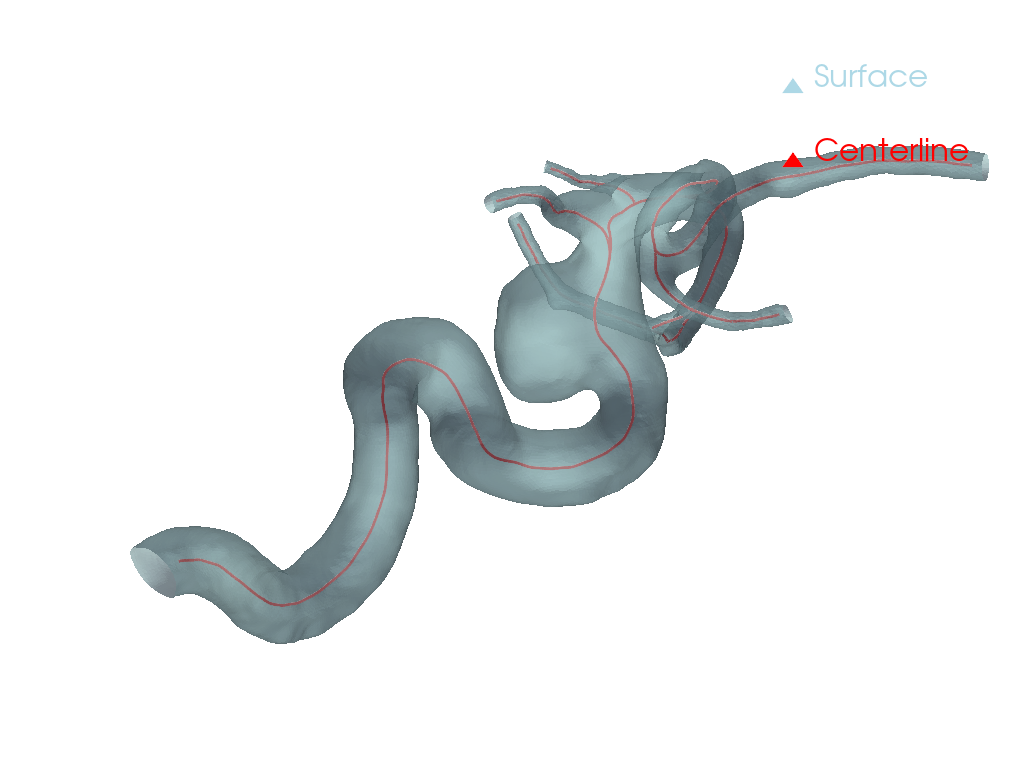

In [11]:
import pyvista as pv
########## LOW RUPTURE RATE
# Load the surface model
surface_low = pv.read("model_low.vtp")  # or model.vtp

# Load the centerline
centerline_low = pv.read("centerlines_low.vtp")

# Plot both together with a customized view
plotter = pv.Plotter()
plotter.add_mesh(surface, color="lightblue", opacity=0.7, label="Surface")
plotter.add_mesh(centerline, color="red", line_width=3, label="Centerline")

# Customize the camera view
plotter.camera_position = 'yz'  # Set the initial view direction (can be 'xy', 'xz', 'yz')
plotter.camera.zoom(1.5)  # Zoom into the object
plotter.camera.roll += 50  # Adjust the camera roll angle

# Add a legend
plotter.add_legend()

# Show the plot
plotter.show()


c:\Users\shrin\anaconda3\Lib\site-packages\pyvista\jupyter\notebook.py:37: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


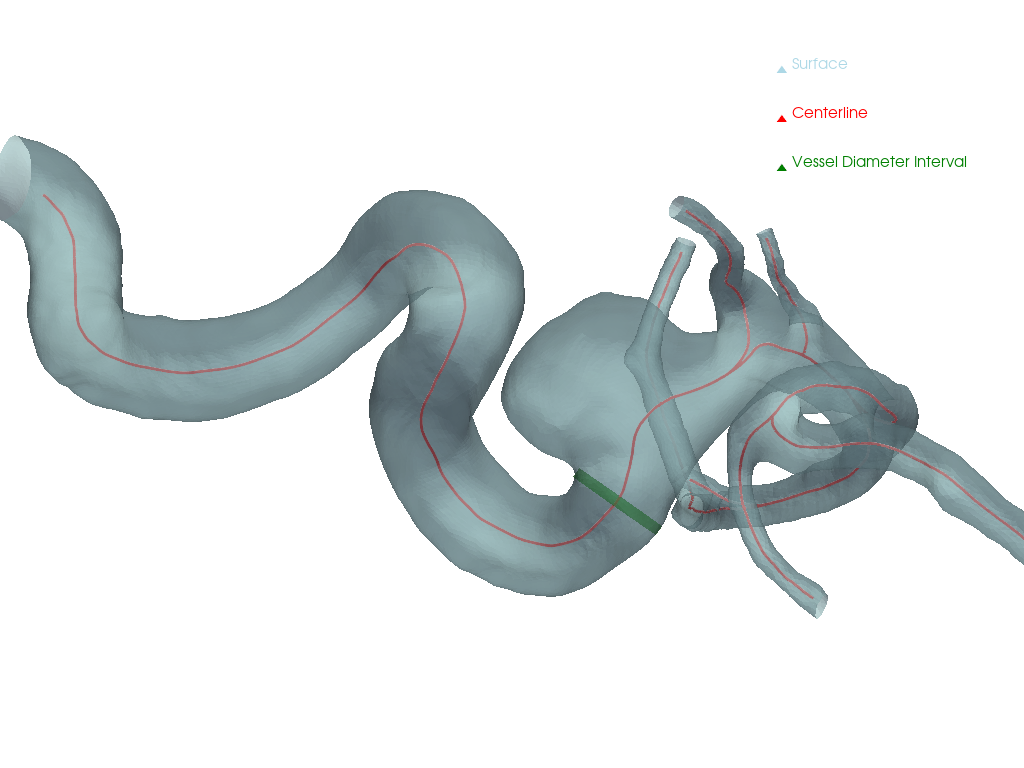

In [133]:
import pyvista as pv

# Load the surface model
surface_low = pv.read("model_low.vtp")  # Replace with your model file

# Load the centerline
centerline_low = pv.read("centerlines_low.vtp")

# Define clipping point and interval
clipping_point = [39.9, 35.7, 18.]  # Coordinates of the clipping point upstream
sphere_radius = 0.5  # Adjust based on the maximum inscribed sphere radius
vessel_radius = 2.47   # Half of the vessel diameter

# Create a sphere for the clipping point
clipping_sphere = pv.Sphere(radius=sphere_radius, center=clipping_point)

# Create a cylinder to represent the interval for vessel diameter averaging
interval_cylinder = pv.Cylinder(center=clipping_point, direction=[0, 0.7, 1], 
                                radius=vessel_radius, height=1 * sphere_radius)

# Plot everything together
plotter = pv.Plotter()
plotter.add_mesh(surface_low, color="lightblue", opacity=0.7, label="Surface")
plotter.add_mesh(centerline_low, color="red", line_width=3, label="Centerline")
plotter.add_mesh(interval_cylinder, color="green", opacity=0.5, label="Vessel Diameter Interval")

# Customize the camera view
plotter.camera_position = 'yz'
plotter.camera.zoom(2.0)
plotter.camera.roll += 0

# Add a legend and show
plotter.add_legend()
plotter.show()


c:\Users\shrin\anaconda3\Lib\site-packages\pyvista\jupyter\notebook.py:37: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


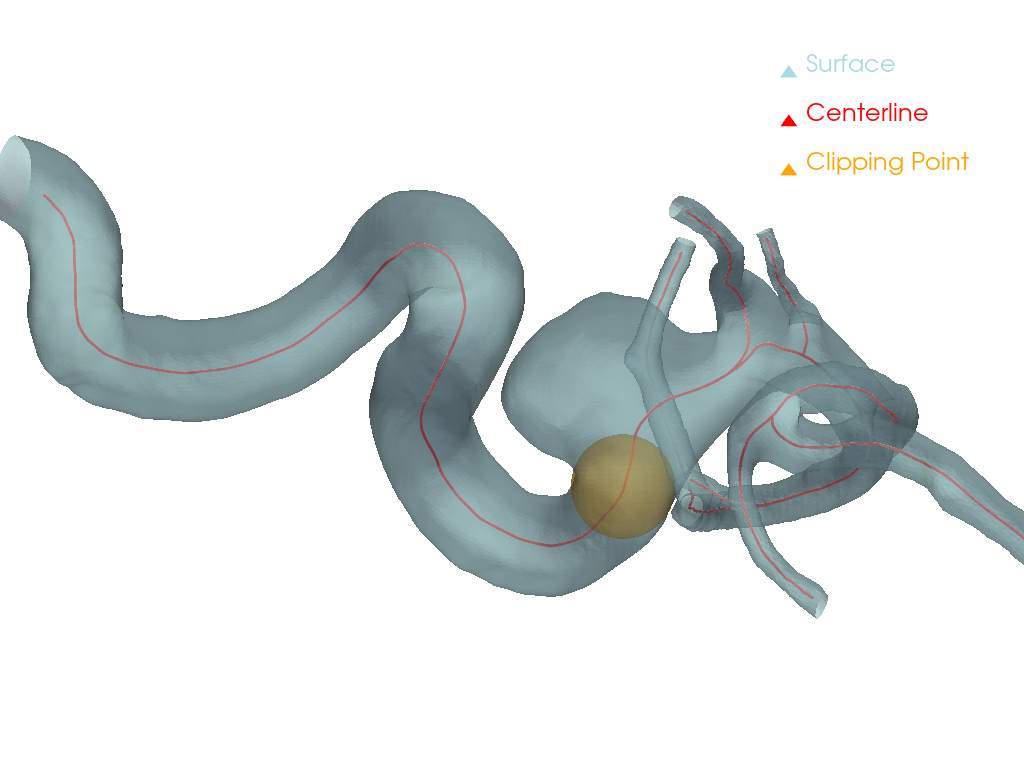

In [100]:
import pyvista as pv

# Load the surface model
surface_low = pv.read("model_low.vtp")  # Replace with your model file

# Load the centerline
centerline_low = pv.read("centerlines_low.vtp")

# Define clipping point and interval
clipping_point = [39, 36, 18.7]  # Coordinates of the clipping point upstream
sphere_radius = 2.57  # Adjust based on the maximum inscribed sphere radius

# Create a sphere for the clipping point
clipping_sphere = pv.Sphere(radius=sphere_radius, center=clipping_point)



# Plot everything together
plotter = pv.Plotter()
plotter.add_mesh(surface_low, color="lightblue", opacity=0.7, label="Surface")
plotter.add_mesh(centerline_low, color="red", line_width=3, label="Centerline")
plotter.add_mesh(clipping_sphere, color="orange", opacity=0.5, label="Clipping Point")

# Customize the camera view
plotter.camera_position = 'yz'
plotter.camera.zoom(2.0)
plotter.camera.roll += 0

# Add a legend and show
plotter.add_legend()
plotter.show()


In [15]:
import vtk

# Load the surface model
surface_reader = vtk.vtkXMLPolyDataReader()
surface_reader.SetFileName("model_low.vtp")
surface_reader.Update()
surface = surface_reader.GetOutput()

# Load the centerline
centerline_reader = vtk.vtkXMLPolyDataReader()
centerline_reader.SetFileName("centerlines_low.vtp")
centerline_reader.Update()
centerline = centerline_reader.GetOutput()

# Create a mapper and actor for the surface
surface_mapper = vtk.vtkPolyDataMapper()
surface_mapper.SetInputData(surface)
surface_actor = vtk.vtkActor()
surface_actor.SetMapper(surface_mapper)
surface_actor.GetProperty().SetColor(0.5, 0.8, 1.0)  # Light blue color
surface_actor.GetProperty().SetOpacity(0.7)  # Set opacity

# Create a mapper and actor for the centerline
centerline_mapper = vtk.vtkPolyDataMapper()
centerline_mapper.SetInputData(centerline)
centerline_actor = vtk.vtkActor()
centerline_actor.SetMapper(centerline_mapper)
centerline_actor.GetProperty().SetColor(1.0, 0.0, 0.0)  # Red color
centerline_actor.GetProperty().SetLineWidth(3)

# Create a renderer and render window
renderer = vtk.vtkRenderer()
render_window = vtk.vtkRenderWindow()
render_window.AddRenderer(renderer)

# Create an interactor
render_window_interactor = vtk.vtkRenderWindowInteractor()
render_window_interactor.SetRenderWindow(render_window)

# Add the actors to the renderer
renderer.AddActor(surface_actor)
renderer.AddActor(centerline_actor)

# Set the camera view
camera = renderer.GetActiveCamera()
camera.SetViewUp(0, 1, 0)  # Set the view-up direction
camera.SetPosition(0, -1, 0)  # Set the position of the camera
camera.Roll(50)  # Adjust the roll angle
renderer.ResetCamera()
camera.Zoom(1.5)  # Zoom into the object

# Set background color
renderer.SetBackground(0.1, 0.1, 0.1)  # Dark background

# Render and start interaction
render_window.Render()
render_window_interactor.Start()
